In [29]:
import pandas as pd
import matplotlib
import seaborn as sns
# matplotlib.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [30]:
oil = pd.read_csv("oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [31]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


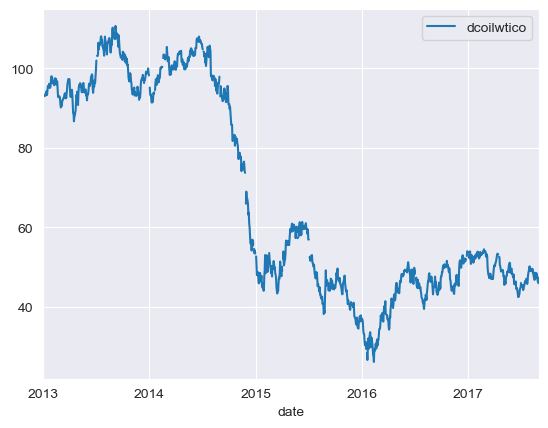

In [32]:
oil.astype({'date':'datetime64[ns]'}).plot(x='date', y='dcoilwtico');

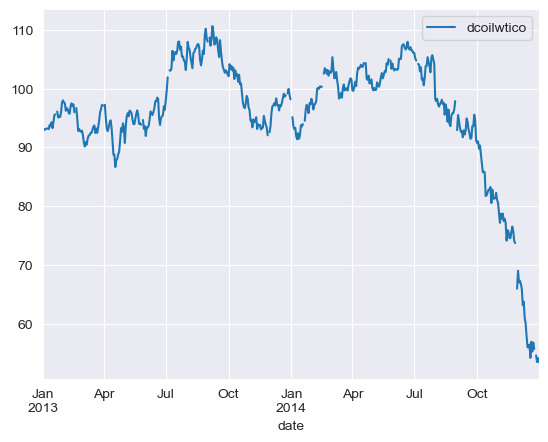

In [33]:
oil.astype({'date':'datetime64[ns]'}).set_index('date').loc['2013':'2014'].plot();

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

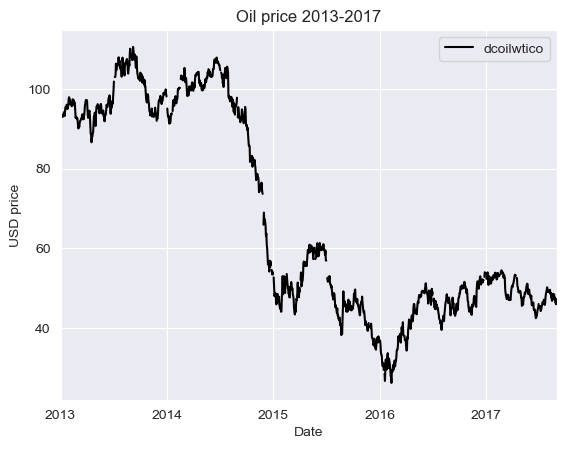

In [34]:
oil.astype({'date':'datetime64[ns]'}).set_index('date').plot(
    title='Oil price 2013-2017',
    ylabel='USD price',
    xlabel='Date',
    color='black'
);

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [35]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [36]:
new_transactions_df = transactions.query('store_nbr in [1,2,3,4]').astype({'date':'datetime64[ns]'}).reset_index(drop=True).pivot_table(
    index='date', columns='store_nbr', values='transactions')
new_transactions_df.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


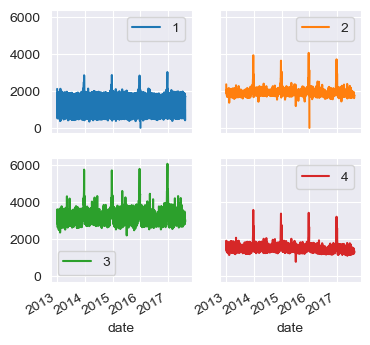

In [37]:
new_transactions_df.plot(subplots=True,
                         layout=(2,2),
                         sharey=True,
#                          legend=False,
#                          title=('store 1','store 2', 'store 3', 'store 4'),
                         figsize=(4,4)
                        );

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [38]:
# convert dates to datetime64
store = range(1,5)

new_trn_df = transactions.query('store_nbr in @store').astype({'date':'datetime64[ns]'}).pivot_table(
    index='date', columns='store_nbr', values='transactions')
new_trn_df.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='store_nbr'>

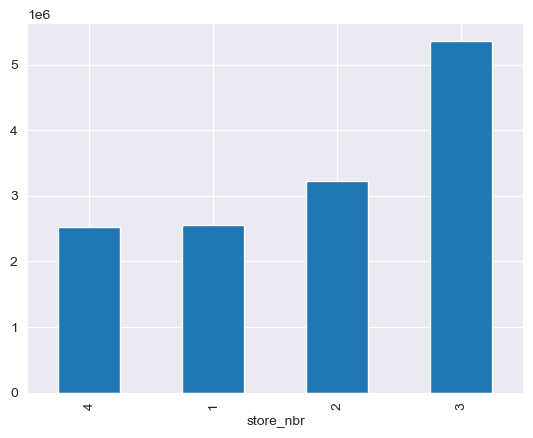

In [39]:
new_trn_df.sum().sort_values().plot.bar()

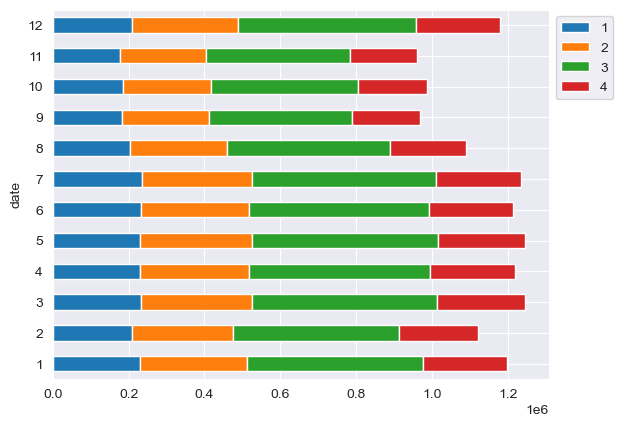

In [40]:
# df.index.month will allow you to groupby the month! You can also slice it.
monthly_performance = new_trn_df.groupby(new_trn_df.index.month).sum()
monthly_performance.plot.barh(stacked=True).legend(bbox_to_anchor=(1,1));

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [41]:
stores_1234 = pd.read_csv('transactions.csv').query('store_nbr in [1,2,3,4]').astype({'date':'datetime64[ns]'})
stores_1234.head()

,date,store_nbr,transactions
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
47,2013-01-03,1,1833


In [42]:
store_1234_pivot = stores_1234.pivot_table(index='date', columns='store_nbr', values='transactions')
store_1234_pivot.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


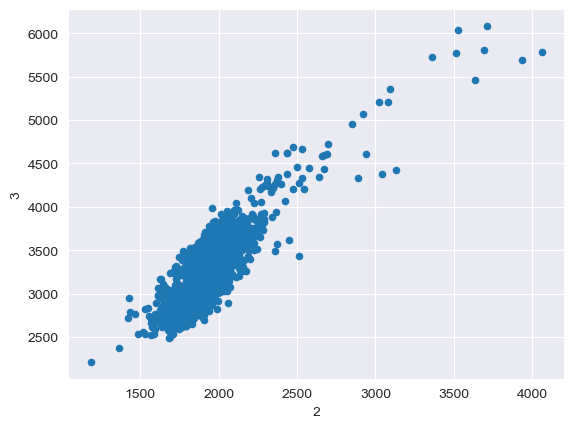

In [43]:
store_1234_pivot.plot.scatter(x=2, y=3);

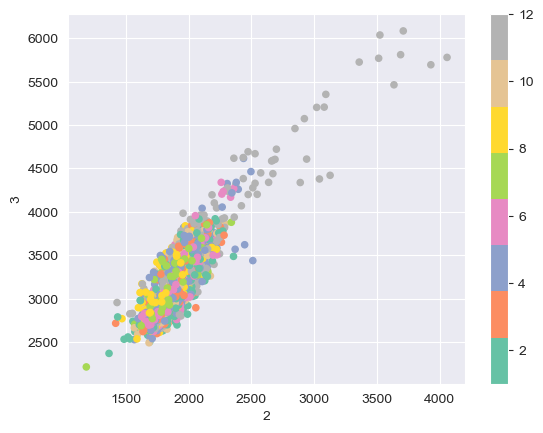

In [50]:
store_1234_pivot.plot.scatter(x=2,
                              y=3,
                              c=store_1234_pivot.index.month,
                              cmap='Set2'
                             );

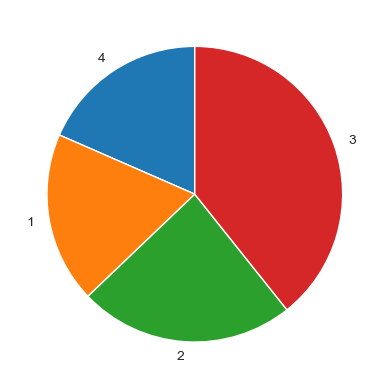

In [55]:
store_1234_pivot.sum().sort_values().plot.pie(startangle=90);

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [ ]:
stores_1234 = pd.read_csv('transactions.csv').query('store_nbr in [1,2,3,4]').astype({'date':'datetime64[ns]'})
stores_1234.head()

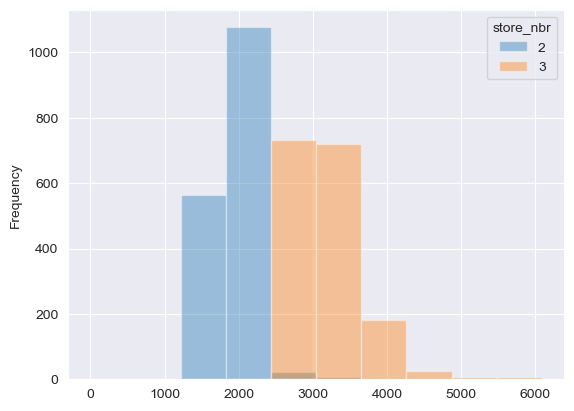

In [67]:
store_1234_pivot.loc[:, [2,3]].plot.hist(alpha=0.4);